In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Reading Dataframe**

In [ ]:
url="https://raw.githubusercontent.com/manishbhnau/Repo/master/Credit.csv"
df=pd.read_csv(url)
print (df.head(3))
print (df.columns.tolist())
print (df.shape)

   Unnamed: 0   Income  Limit  Rating  ...  Married  Ethnicity  Balance Defaultee
0           1   14.891   3606     283  ...      Yes  Caucasian      333         0
1           2  106.025   6645     483  ...      Yes      Asian      903         0
2           3  104.593   7075     514  ...       No      Asian      580         0

[3 rows x 13 columns]
['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance', 'Defaultee']
(400, 13)


# **Plotting the Group**

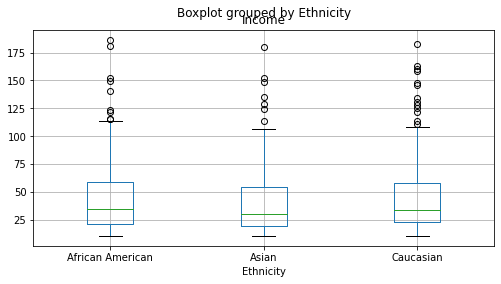

In [ ]:
df.boxplot('Income', by='Ethnicity', figsize=(8, 4))

# **statsmodels**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Income ~ Ethnicity', data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

              df         sum_sq      mean_sq         F    PR(>F)
Ethnicity    2.0     805.768191   402.884096  0.323242  0.723989
Residual   397.0  494815.589392  1246.386875       NaN       NaN


In [ ]:
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
aov_table['EtaSq'] = [esq_sm, 'NaN']
print(aov_table)

              df         sum_sq      mean_sq         F    PR(>F)       EtaSq
Ethnicity    2.0     805.768191   402.884096  0.323242  0.723989  0.00162577
Residual   397.0  494815.589392  1246.386875       NaN       NaN         NaN


In [ ]:
pair_t = mod.t_test_pairwise('Ethnicity')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Asian-African American,-3.494268,4.980888,-0.701535,0.483380,-13.286482,6.297946,0.848716,False
Caucasian-African American,-3.160156,4.342006,-0.727810,0.467159,-11.696355,5.376043,0.848716,False
Caucasian-Asian,0.334111,4.299155,0.077716,0.938093,-8.117843,8.786066,0.938093,False


# **pingouin**

In [ ]:
#!pip install pingouin

In [ ]:
#!pip install pingouin
import pingouin as pg

aov = pg.anova(data=df, dv='Income', between='Ethnicity', detailed=True)
print(aov)

      Source             SS   DF           MS         F     p-unc       np2
0  Ethnicity     805.768191    2   402.884096  0.323242  0.723989  0.001626
1     Within  494815.589392  397  1246.386875       NaN       NaN       NaN


In [ ]:
pt = pg.pairwise_tukey(dv='Income', between='Ethnicity', data=df)
print(pt)

                  A          B    mean(A)  ...         T   p-tukey    hedges
0  African American      Asian  47.682101  ...  0.701535  0.796342  0.098602
1  African American  Caucasian  47.682101  ...  0.727810  0.784980  0.089285
2             Asian  Caucasian  44.187833  ... -0.077716  0.900000 -0.009440

[3 rows x 10 columns]


In [ ]:
cpt = pg.pairwise_tukey(dv='Income', between='Ethnicity', effsize='cohen', data=df)
print(cpt)

                  A          B    mean(A)  ...         T   p-tukey     cohen
0  African American      Asian  47.682101  ...  0.701535  0.796342  0.098976
1  African American  Caucasian  47.682101  ...  0.727810  0.784980  0.089512
2             Asian  Caucasian  44.187833  ... -0.077716  0.900000 -0.009464

[3 rows x 10 columns]
